# Linear Regression

### The Problem
Given a set of points on a 2D plane, how can we find the best fit line?

### The Theory
We find the best fit line y = mx + c by minimizing the sum of squared errors.

### How it works
1. Initialise the line y = mx + c with a random value
2. Calculate the sum of squared errors
3. Using the power rule, we calculate the partial derivative of the error function with respect to both m and b
4. Calculate the step-gradient using the partial derivatives
5. Obtain new m and b values by multiplying the step-gradients for m abd b with the learning rate
6. Repeat steps 2-5 until the optimal gradient is met

In [5]:
# import numpy
import numpy as np

In [6]:
# define functions

# compute error
def compute_error_for_line_given_points(b, m, points):
    # initialise error as 0
    totalError = 0
    # get x and y values from data
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        # calculate the square of y (from data) minus point on our line
        totalError += (y - (m * x + b)) ** 2
    # return the total error as a float
    return totalError / float(len(points))

# calculate the new b and new m using step gradient
def step_gradient(b_current, m_current, points, learning_rate):
    # initialise gradients as 0
    b_gradient = 0
    m_gradient = 0
    # N is the number of points
    N = float(len(points))
    # for every point, calculate b-gradient and m-gradient using their partial derivatives
    # then sum them up together
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        # use chain rule to calculate the formula
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    # calculate new b and new m
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return [new_b, new_m]

# iterate num_iteration times, running step gradient function each time
def gradient_descent_iterator(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)
    # return the final values after training
    return b, m

In [7]:
# initialise parameters

# get datapoints from data.csv, using "," as the delimiter
points = np.genfromtxt("data.csv", delimiter=",")
# set learning rate that will determine how fast b and m will change
learning_rate = 0.0001
# initial y-intercept guess
initial_b = 0
# initial slope guess
initial_m = 0
# number of times we will run the functions
num_iterations = 1000

In [51]:
# run the code and print results

print("Starting gradient descent at b = {0}, m = {1}, error = {2}"\
      .format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
b, m = gradient_descent_iterator(points, initial_b, initial_m, learning_rate, num_iterations)
print("After {0} iterations b = {1}, m = {2}, error = {3}"\
      .format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
After 1000 iterations b = 0.08893651993741346, m = 1.4777440851894448, error = 112.61481011613473


### Plot Graph

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

In [53]:
# get all data points
x, y = zip(*points)

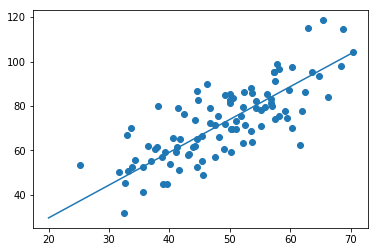

In [55]:
# plot graph

# scatter graph of all points
plt.scatter(x,y)

# plot best fit line from 20 to 70
x1 = np.linspace(20,70)
plt.plot(x1, (m*x1 + b), '-')